Data Prepocesssing

In [14]:
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf 

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
def mean_mfccs(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def parse_audio(x):
    return x.flatten('F')[:x.shape[0]] 

def get_audios():
    train_path = "../input/train/Train/"
    train_file_names = os.listdir(train_path)
    train_file_names.sort(key=lambda x: int(x.partition('.')[0]))
    
    samples = []
    for file_name in train_file_names:
        x, sr = sf.read(train_path + file_name, always_2d=True)
        x = parse_audio(x)
        samples.append(mean_mfccs(x))
        
    return np.array(samples)

def get_samples():
    df = pd.read_csv('../input/train.csv')
    return get_audios(), df['Class'].values

X, Y = get_samples()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Shape: {X_train.shape}')
print(f'Observation: \n{X_train[0]}')
print(f'Labels: {Y_train[:5]}')

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)
print(cm)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


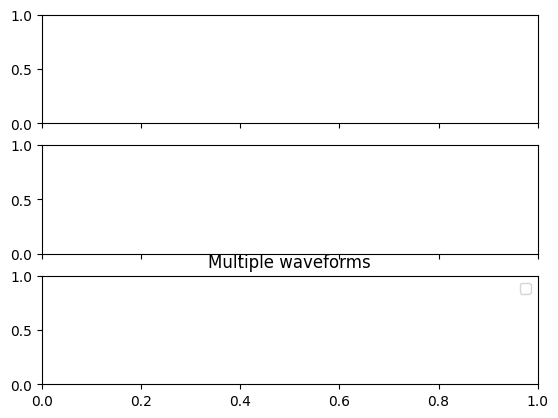

In [31]:
path = '..\\Audio\\T'
# for audio_file in os.listdir(path):
# 	y, sr = librosa.load('\\'.join((path,audio_file)), sr = 32000)
# 	librosa.display.waveshow(y[:int(sr*6.7)], max_points=11025, axis='s')

fig, ax = plt.subplots(nrows=3, sharex=True)
y, sr = librosa.load('\\'.join((path,'T1.wav')), sr = 32000)
y_harm, y_perc = librosa.effects.hpss(y)
# librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()
plt.show()